In [1]:
# Importing the Data Analysing, Data Visualizing, Data Preppping & Model Building Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from twilio.rest import TwilioRestClient
%pylab inline

/Users/VKY/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/VKY/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


### Acquiring the Data

- We have a training dataset of 160000 observations and 51 features inclusing the Target variable
- We have a testing dataset of 40000 observations and 50 features

In [2]:
# Loading the training and testing datasets into DataFrames
train_df = pd.read_csv("midterm_train.csv")
test_df = pd.read_csv("midterm_test.csv")

In [3]:
# Checking the type of training dataframe
type(train_df)

pandas.core.frame.DataFrame

In [4]:
# Checking the type of testing dataset
type(test_df)

pandas.core.frame.DataFrame

In [5]:
# Creating combined list of both datasets
combined = [train_df, test_df]

### Analysing the Data

In [6]:
# Checking top 5 observations from the training dataframe
train_df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-5.900707,0.469389,4.733068,9.223027,3.170787,0.024669,-2.055880,-2.045466,3.004170,0.02%,...,-3.694592,-1.008670,wednesday,$-180.16,1.236134,4.462951,4.592803,-0.034478,3.680401,0
1,-3.530391,4.229818,-4.619433,2.154913,5.619903,-1.955667,7.713001,-1.279395,14.941269,0.0%,...,6.414948,5.831287,tuesday,$432.31,-6.570015,-5.308026,-5.462467,-0.229518,-2.332947,1
2,1.003389,-0.012547,6.250503,3.368675,1.711321,6.192718,4.166159,-0.363055,15.175681,-0.01%,...,0.371862,-7.025987,wednesday,$-119.17,-66.851394,-11.084558,-11.407072,6.395551,3.545332,0
3,-16.041769,-3.243507,-0.546649,-11.594427,5.111965,0.609785,-1.540136,-1.227567,-16.460535,-0.0%,...,-2.920478,-2.135088,thurday,$-1309.54,0.442939,11.808383,12.151957,-2.923916,-1.471336,0
4,20.498575,10.766191,1.478032,-5.723594,-0.768839,-3.482515,-11.169389,-0.361478,2.194909,-0.02%,...,-1.769904,-0.532896,wednesday,$-1103.32,61.136654,48.077895,49.476758,1.043061,9.927952,1


In [7]:
# Checking top 5 observations from the testing dataframe
test_df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,13.864410,0.986217,6.835099,12.129012,1.141835,0.257978,6.119007,-0.217401,-0.913796,0.0%,...,-11.997662,-3.078159,4.129892,wednesday,$376.12,21.431275,10.409146,10.712008,4.278259,-6.113483
1,17.075344,-8.614119,9.730068,3.645163,18.618751,-1.134351,1.324885,2.750353,-21.323635,-0.01%,...,0.782677,4.364007,-2.506411,wednesday,$1058.58,31.912299,23.853665,24.547705,1.835443,-0.698576
2,-16.080927,1.490433,7.290475,12.770805,-2.401559,-0.143236,-9.110707,-0.044362,-22.508253,0.0%,...,1.447475,2.394701,-4.988773,tuesday,$388.08,24.751632,9.235573,9.504289,-4.228346,-0.363838
3,8.955804,-2.612907,2.740679,9.704034,-1.524375,-4.001874,3.843455,0.358459,0.900835,-0.01%,...,3.065369,-3.997100,6.548292,tuesday,$272.45,19.673348,-20.449157,-21.044141,-11.225027,9.176861
4,-1.243500,9.752493,-1.931690,1.224566,-18.678339,0.390264,10.615600,3.774666,-10.091425,-0.01%,...,-0.233386,4.280341,-3.315470,thurday,$-127.28,-5.184808,4.179362,4.300964,-1.475613,1.628260


In [8]:
# Checking (Observations, Features) in the training dataframe
train_df.shape

(160000, 51)

In [9]:
# Checking (Observations, Features) in the testing dataframe
test_df.shape

(40000, 50)

In [10]:
# Checking basic statistics for the continous data in training dataframe
train_df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x10,...,x39,x40,x41,x42,x45,x46,x47,x48,x49,y
count,159964.000000,159973.000000,159973.000000,159963.000000,159969.000000,159971.000000,159973.000000,159974.000000,159965.000000,159962.000000,...,159952.000000,159969.000000,159980.000000,159965.000000,159972.000000,159974.000000,159970.000000,159974.000000,159974.000000,160000.000000
mean,1.540669,2.020926,0.007805,2.471131,0.004914,0.100313,0.020943,0.000992,0.004064,-0.004841,...,0.019918,-0.014515,-0.004971,0.006440,0.882868,0.070251,0.072817,-0.004404,-0.004627,0.400550
std,16.401459,7.462316,6.806854,9.624773,6.275538,2.173207,7.753960,2.414990,9.165963,2.845066,...,6.698498,4.973109,5.428919,6.743532,23.987879,17.732750,18.248654,4.468600,3.610345,0.490011
min,-68.981217,-31.258618,-30.506154,-36.350492,-27.575136,-13.677304,-32.781282,-11.615171,-38.961689,-11.978764,...,-27.076148,-23.265768,-24.602106,-32.319316,-121.292948,-72.694807,-74.809917,-20.696774,-16.991354,0.000000
25%,-9.450919,-2.890069,-4.609020,-4.029733,-4.225946,-1.375403,-5.197125,-1.639263,-6.159416,-1.921991,...,-4.508069,-3.381291,-3.668357,-4.523615,-14.596689,-12.239755,-12.595786,-3.020220,-2.438833,0.000000
50%,1.841792,2.202444,0.010002,2.584225,-0.005805,0.058102,-0.017482,0.000816,0.244471,-0.001742,...,0.027664,0.001465,-0.017824,0.010728,0.890783,-0.449057,-0.462448,-0.000494,-0.001601,0.000000
75%,12.786656,7.002078,4.623164,9.015845,4.256802,1.550611,5.268370,1.627674,6.257305,1.918158,...,4.550137,3.344760,3.649917,4.562162,16.559588,11.987409,12.336756,3.003253,2.424888,1.000000
max,70.882303,39.193550,28.699898,47.313496,28.571894,10.006106,34.460095,10.794778,39.216249,13.644499,...,29.862557,23.132292,22.938242,28.980718,136.368013,77.429817,79.682696,19.217507,15.117022,1.000000


In [11]:
# Checking basic statistics for the continous data in testing dataframe
test_df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x10,...,x38,x39,x40,x41,x42,x45,x46,x47,x48,x49
count,39991.000000,39988.000000,39995.000000,39990.000000,39995.000000,39990.000000,39992.000000,39994.000000,39990.000000,39994.000000,...,39992.000000,39995.000000,39996.000000,39992.000000,39992.000000,39992.000000,39993.000000,39993.000000,39994.000000,39993.000000
mean,1.663499,2.011510,-0.008737,2.581840,-0.002900,0.120855,-0.010031,-0.007377,0.040697,0.007054,...,-0.050583,0.018816,0.007086,-0.019522,0.009597,0.930736,-0.073203,-0.078351,-0.034260,-0.021427
std,16.322478,7.438927,6.775522,9.595556,6.326771,2.175570,7.744062,2.423130,9.143387,2.826357,...,8.987204,6.721710,4.969983,5.417391,6.742955,24.082147,17.703642,18.217413,4.482634,3.634552
min,-66.641748,-29.220241,-30.654468,-33.740495,-24.219525,-9.337712,-31.532589,-9.639828,-37.491770,-12.052411,...,-37.351741,-28.139802,-20.089918,-22.729694,-27.095716,-125.492433,-69.270311,-71.285783,-18.056582,-15.489350
25%,-9.222814,-2.862322,-4.564484,-3.878327,-4.238426,-1.352953,-5.219120,-1.641438,-6.086353,-1.893490,...,-6.123378,-4.509226,-3.367502,-3.677512,-4.550944,-14.632553,-12.417612,-12.783629,-3.042477,-2.466570
50%,1.948448,2.216943,-0.042482,2.710285,0.011356,0.074250,-0.030783,-0.007113,0.308558,0.004509,...,-0.066102,0.013268,0.002512,0.023989,0.044790,0.938133,-0.621119,-0.645373,-0.012867,-0.030384
75%,12.888837,6.987782,4.558655,9.133568,4.249599,1.573182,5.217230,1.624408,6.315229,1.919187,...,6.018019,4.535902,3.355578,3.656905,4.587494,16.715874,11.698938,12.038218,2.989199,2.442418
max,65.120296,33.767006,29.934983,41.477703,24.979411,9.506645,33.851570,10.263608,37.608023,13.064377,...,46.291216,26.812810,20.284344,19.954633,26.461639,113.671413,75.574199,77.773088,18.988115,14.627478


In [12]:
# Checking statistics for the categorical data in training dataframe
train_df.describe(include = ['O'])

,x9,x16,x19,x43,x44
count,159966,159964,159971,159973,159961
unique,12,3,12,5,129468
top,0.01%,asia,Jun,wednesday,$245.6
freq,38827,138509,44659,101016,6


In [13]:
# Checking statistics for the categorical data in testing dataframe
test_df.describe(include=['O'])

,x9,x16,x19,x43,x44
count,39997,39989,39994,39993,39990
unique,11,3,12,5,37801
top,-0.01%,asia,Jun,wednesday,$537.54
freq,9647,34620,11136,25397,5


#### Understanding Continous Features

- Some of the continous features seems to have very high standard deviations from the mean which means that they would be far from correlation with the target variable, we might want to identify and avoid those in the final model
- We have days, months and countries from the categorical features. We should consider multiple combinations to check which combinations gives best predictions

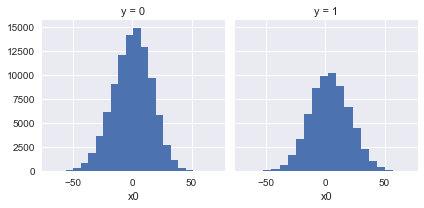

In [14]:
x0_variable = sns.FacetGrid(train_df, col='y')
x0_variable.map(plt.hist, 'x0', bins=20)

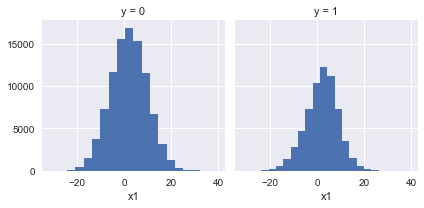

In [15]:
x1_variable = sns.FacetGrid(train_df, col='y')
x1_variable.map(plt.hist, 'x1', bins=20)

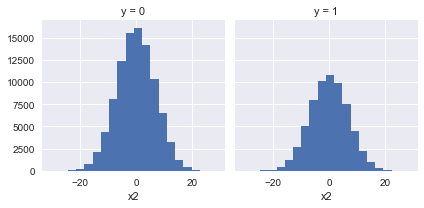

In [16]:
x2_variable = sns.FacetGrid(train_df, col='y')
x2_variable.map(plt.hist, 'x2', bins=20)

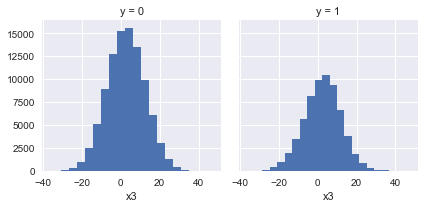

In [17]:
x3_variable = sns.FacetGrid(train_df, col='y')
x3_variable.map(plt.hist, 'x3', bins=20)

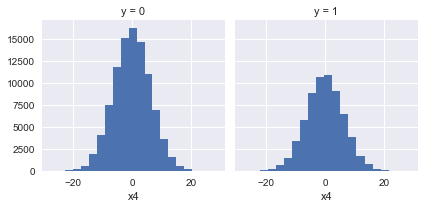

In [18]:
x4_variable = sns.FacetGrid(train_df, col='y')
x4_variable.map(plt.hist, 'x4', bins=20)

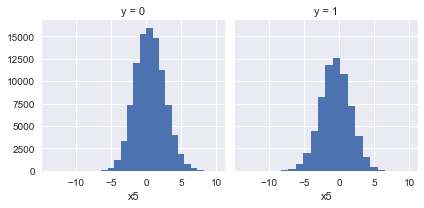

In [19]:
x5_variable = sns.FacetGrid(train_df, col='y')
x5_variable.map(plt.hist, 'x5', bins=20)

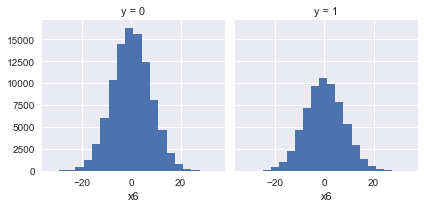

In [20]:
x6_variable = sns.FacetGrid(train_df, col='y')
x6_variable.map(plt.hist, 'x6', bins=20)

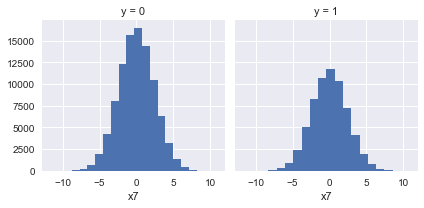

In [21]:
x7_variable = sns.FacetGrid(train_df, col='y')
x7_variable.map(plt.hist, 'x7', bins=20)

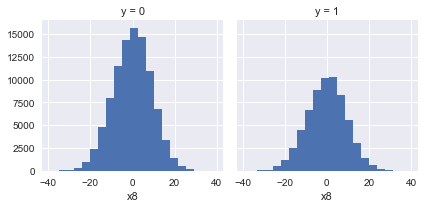

In [22]:
x8_variable = sns.FacetGrid(train_df, col='y')
x8_variable.map(plt.hist, 'x8', bins=20)

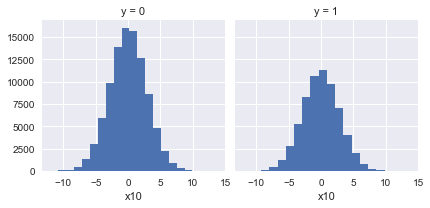

In [23]:
x10_variable = sns.FacetGrid(train_df, col='y')
x10_variable.map(plt.hist, 'x10', bins=20)

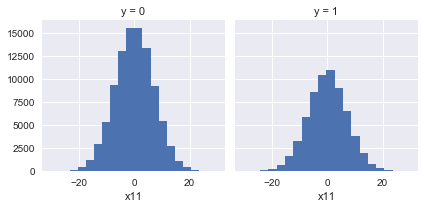

In [24]:
x11_variable = sns.FacetGrid(train_df, col='y')
x11_variable.map(plt.hist, 'x11', bins=20)

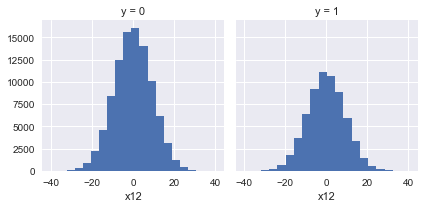

In [25]:
x12_variable = sns.FacetGrid(train_df, col='y')
x12_variable.map(plt.hist, 'x12', bins=20)

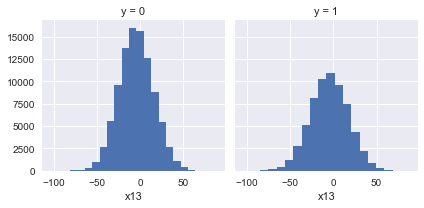

In [26]:
x13_variable = sns.FacetGrid(train_df, col='y')
x13_variable.map(plt.hist, 'x13', bins=20)

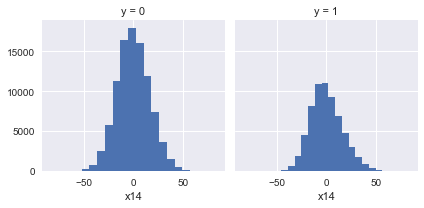

In [27]:
x14_variable = sns.FacetGrid(train_df, col='y')
x14_variable.map(plt.hist, 'x14', bins=20)

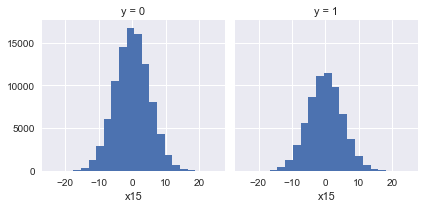

In [28]:
x15_variable = sns.FacetGrid(train_df, col='y')
x15_variable.map(plt.hist, 'x15', bins=20)

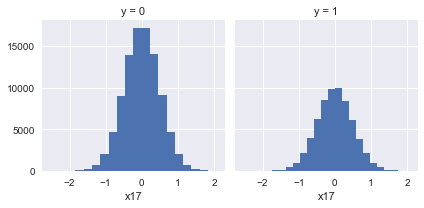

In [29]:
x17_variable = sns.FacetGrid(train_df, col='y')
x17_variable.map(plt.hist, 'x17', bins=20)

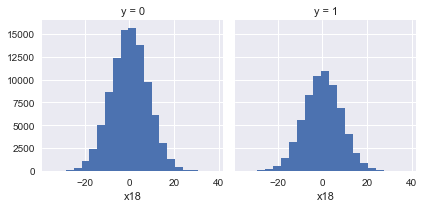

In [30]:
x18_variable = sns.FacetGrid(train_df, col='y')
x18_variable.map(plt.hist, 'x18', bins=20)

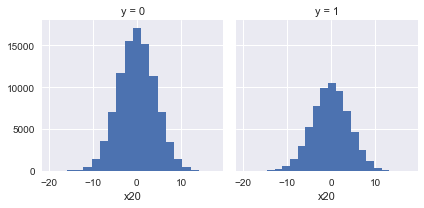

In [31]:
x20_variable = sns.FacetGrid(train_df, col='y')
x20_variable.map(plt.hist, 'x20', bins=20)

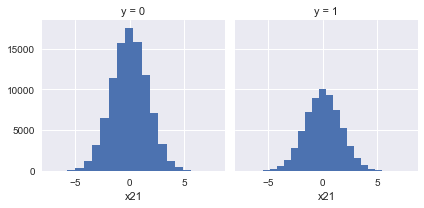

In [32]:
x21_variable = sns.FacetGrid(train_df, col='y')
x21_variable.map(plt.hist, 'x21', bins=20)

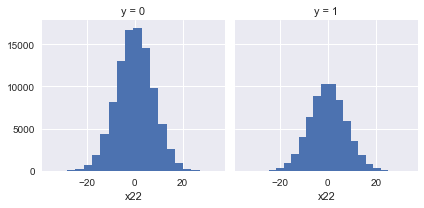

In [33]:
x22_variable = sns.FacetGrid(train_df, col='y')
x22_variable.map(plt.hist, 'x22', bins=20)

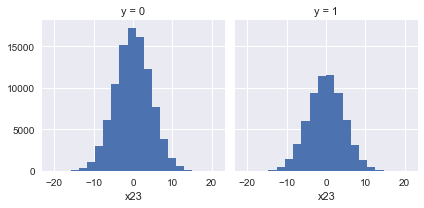

In [34]:
x23_variable = sns.FacetGrid(train_df, col='y')
x23_variable.map(plt.hist, 'x23', bins=20)

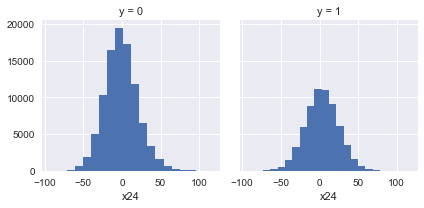

In [35]:
x24_variable = sns.FacetGrid(train_df, col='y')
x24_variable.map(plt.hist, 'x24', bins=20)

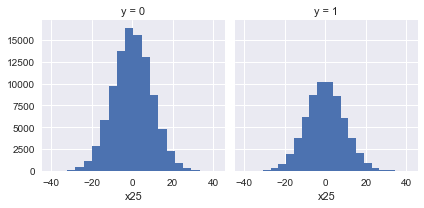

In [36]:
x25_variable = sns.FacetGrid(train_df, col='y')
x25_variable.map(plt.hist, 'x25', bins=20)

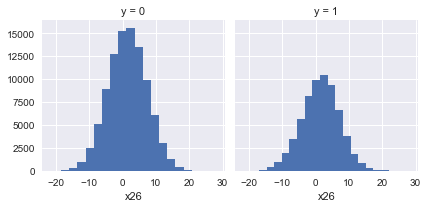

In [37]:
x26_variable = sns.FacetGrid(train_df, col='y')
x26_variable.map(plt.hist, 'x26', bins=20)

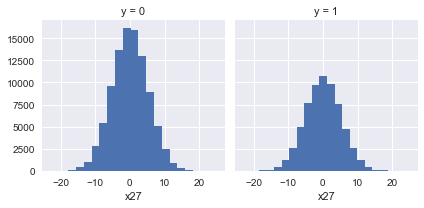

In [38]:
x27_variable = sns.FacetGrid(train_df, col='y')
x27_variable.map(plt.hist, 'x27', bins=20)

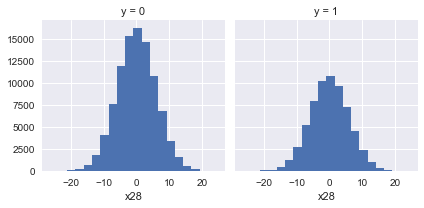

In [39]:
x28_variable = sns.FacetGrid(train_df, col='y')
x28_variable.map(plt.hist, 'x28', bins=20)

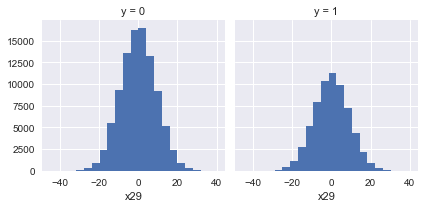

In [40]:
x29_variable = sns.FacetGrid(train_df, col='y')
x29_variable.map(plt.hist, 'x29', bins=20)

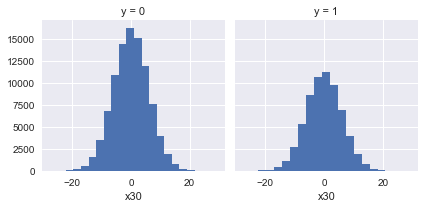

In [41]:
x30_variable = sns.FacetGrid(train_df, col='y')
x30_variable.map(plt.hist, 'x30', bins=20)

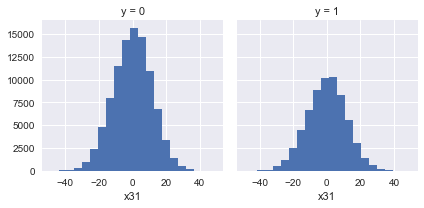

In [42]:
x31_variable = sns.FacetGrid(train_df, col='y')
x31_variable.map(plt.hist, 'x31', bins=20)

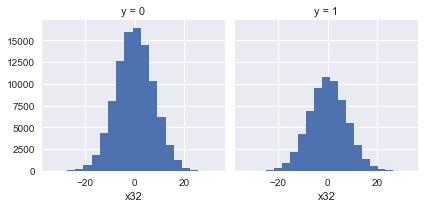

In [43]:
x32_variable = sns.FacetGrid(train_df, col='y')
x32_variable.map(plt.hist, 'x32', bins=20)

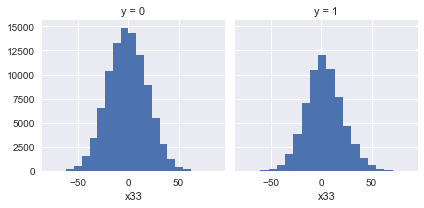

In [44]:
x33_variable = sns.FacetGrid(train_df, col='y')
x33_variable.map(plt.hist, 'x33', bins=20)

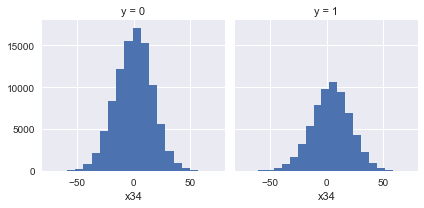

In [45]:
x34_variable = sns.FacetGrid(train_df, col='y')
x34_variable.map(plt.hist, 'x34', bins=20)

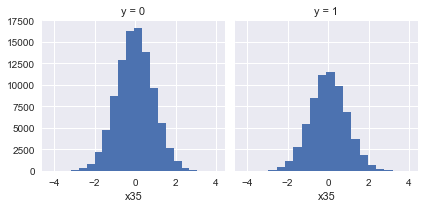

In [46]:
x35_variable = sns.FacetGrid(train_df, col='y')
x35_variable.map(plt.hist, 'x35', bins=20)

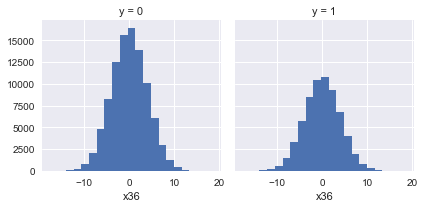

In [47]:
x36_variable = sns.FacetGrid(train_df, col='y')
x36_variable.map(plt.hist, 'x36', bins=20)

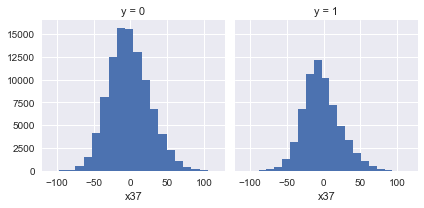

In [48]:
x37_variable = sns.FacetGrid(train_df, col='y')
x37_variable.map(plt.hist, 'x37', bins=20)

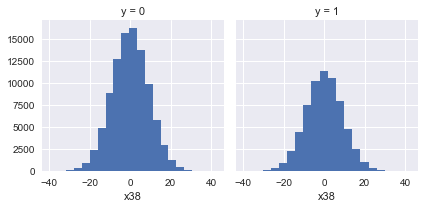

In [49]:
x38_variable = sns.FacetGrid(train_df, col='y')
x38_variable.map(plt.hist, 'x38', bins=20)

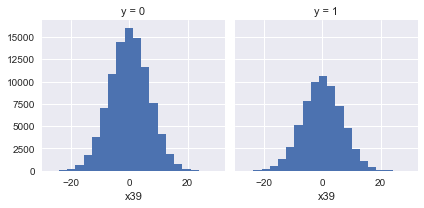

In [50]:
x39_variable = sns.FacetGrid(train_df, col='y')
x39_variable.map(plt.hist, 'x39', bins=20)

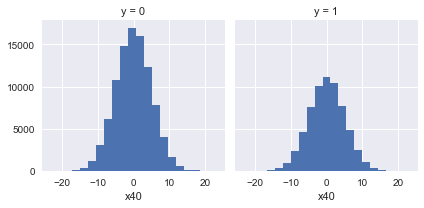

In [51]:
x40_variable = sns.FacetGrid(train_df, col='y')
x40_variable.map(plt.hist, 'x40', bins=20)

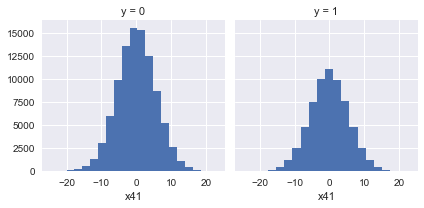

In [52]:
x41_variable = sns.FacetGrid(train_df, col='y')
x41_variable.map(plt.hist, 'x41', bins=20)

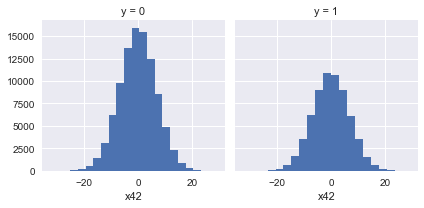

In [53]:
x42_variable = sns.FacetGrid(train_df, col='y')
x42_variable.map(plt.hist, 'x42', bins=20)

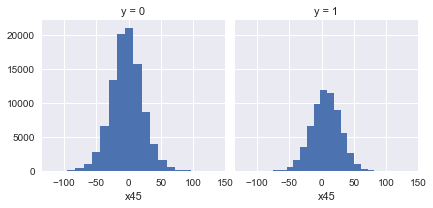

In [54]:
x45_variable = sns.FacetGrid(train_df, col='y')
x45_variable.map(plt.hist, 'x45', bins=20)

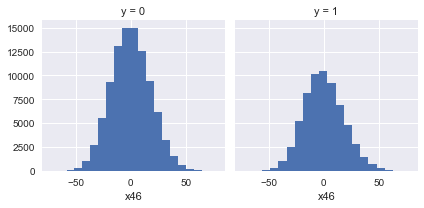

In [55]:
x46_variable = sns.FacetGrid(train_df, col='y')
x46_variable.map(plt.hist, 'x46', bins=20)

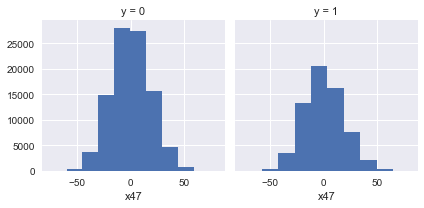

In [56]:
x47_variable = sns.FacetGrid(train_df, col='y')
x47_variable.map(plt.hist, 'x47', bins=10)

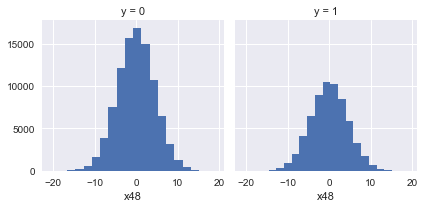

In [57]:
x48_variable = sns.FacetGrid(train_df, col='y')
x48_variable.map(plt.hist, 'x48', bins=20)

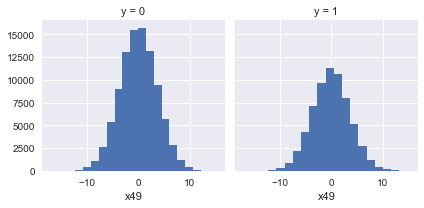

In [58]:
x49_variable = sns.FacetGrid(train_df, col='y')
x49_variable.map(plt.hist, 'x49', bins=20)

#### Understanding Categorical Features

- All the categorical features could be converted into numerical data by applying one-hot-encoding technique
- x9 feature appears to have ordinal data, hence should be tried converting to either numerical or dummies, whichever adds better weight to the model

In [59]:
train_df.x9.value_counts()

0.01%     38827
-0.01%    38572
-0.0%     30771
0.0%      30534
0.02%      9664
-0.02%     9627
-0.03%      957
0.03%       921
-0.04%       55
0.04%        35
0.05%         2
-0.05%        1
Name: x9, dtype: int64

In [60]:
train_df[['x9', 'y']].groupby(['x9'], as_index=False).mean().sort_values(by='y', ascending=False)

,x9,y
11,0.05%,0.500000
7,0.01%,0.403843
0,-0.0%,0.403269
6,0.0%,0.400734
8,0.02%,0.399834
1,-0.01%,0.397750
2,-0.02%,0.394100
3,-0.03%,0.383490
9,0.03%,0.383279
4,-0.04%,0.345455


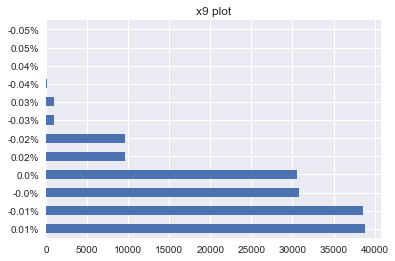

In [61]:
train_df.x9.value_counts().plot(kind='barh').set_title('x9 plot')

In [62]:
train_df.x16.value_counts()

asia       138509
america     12146
euorpe       9309
Name: x16, dtype: int64

In [63]:
train_df[['x16', 'y']].groupby(['x16'], as_index=False).mean().sort_values(by='y', ascending=False)

,x16,y
0,america,0.463939
2,euorpe,0.446772
1,asia,0.391917


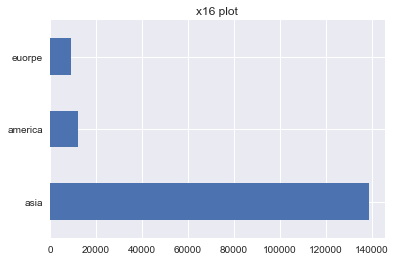

In [64]:
train_df.x16.value_counts().plot(kind='barh').set_title('x16 plot')

In [65]:
train_df.x19.value_counts()

Jun        44659
July       42410
May        27535
Aug        23909
Apr         9945
sept.       7522
Mar         2030
Oct         1508
Feb          264
Nov          160
January       18
Dev           11
Name: x19, dtype: int64

In [66]:
train_df[['x19', 'y']].groupby(['x19'], as_index=False).mean().sort_values(by='y', ascending=False)

,x19,y
9,Nov,0.450000
6,Jun,0.403816
10,Oct,0.402520
8,May,0.400799
5,July,0.400307
1,Aug,0.399975
11,sept.,0.398697
0,Apr,0.394470
4,January,0.388889
3,Feb,0.375000


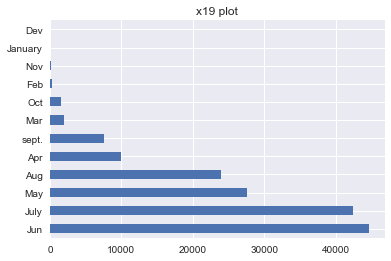

In [67]:
train_df.x19.value_counts().plot(kind='barh').set_title('x19 plot')

In [68]:
train_df.x43.value_counts()

wednesday    101016
thurday       31969
tuesday       25955
friday          562
monday          471
Name: x43, dtype: int64

In [69]:
train_df[['x43', 'y']].groupby(['x43'], as_index=False).mean().sort_values(by='y', ascending=False)

,x43,y
4,wednesday,0.420785
2,thurday,0.374050
3,tuesday,0.362743
1,monday,0.201699
0,friday,0.183274


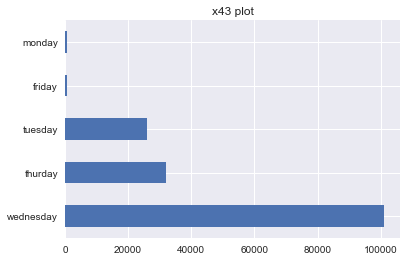

In [70]:
train_df.x43.value_counts().plot(kind='barh').set_title('x43 plot')

In [71]:
train_df.x44.value_counts()

$245.6       6
$48.84       6
$-41.44      6
$505.4       6
$367.28      6
$768.74      6
$-370.58     6
$207.33      6
$177.66      5
$880.66      5
$-21.07      5
$-119.46     5
$-335.44     5
$-893.78     5
$403.01      5
$230.26      5
$-374.82     5
$190.29      5
$639.27      5
$-144.78     5
$113.3       5
$-359.09     5
$472.74      5
$-114.92     5
$658.93      5
$134.6       5
$76.67       5
$282.55      5
$-46.88      5
$1092.4      5
            ..
$-1734.23    1
$1632.33     1
$-683.74     1
$-341.5      1
$1152.6      1
$-39.81      1
$877.34      1
$369.66      1
$720.98      1
$-186.77     1
$-130.45     1
$857.72      1
$-1192.99    1
$1226.07     1
$947.41      1
$-635.98     1
$575.23      1
$1659.27     1
$-607.38     1
$-1155.39    1
$1476.82     1
$1015.96     1
$3075.04     1
$1688.66     1
$170.59      1
$626.21      1
$2689.59     1
$1561.11     1
$-1537.71    1
$1741.11     1
Name: x44, dtype: int64

In [72]:
train_df[['x44', 'y']].groupby(['x44'], as_index=False).mean().sort_values(by='y', ascending=False)

,x44,y
0,$-0.01,1.0
65948,$1029.52,1.0
65875,$1027.44,1.0
65876,$1027.49,1.0
65878,$1027.52,1.0
65881,$1027.66,1.0
65882,$1027.67,1.0
65890,$1027.83,1.0
65893,$1027.9,1.0
65894,$1027.95,1.0


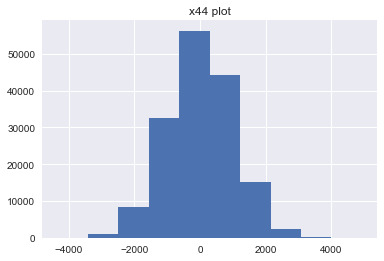

In [91]:
train_df.x44.hist(bins=10).set_title('x44 plot')

In [74]:
# Checking missing values in the training dataframe
train_df.isnull().sum()

x0     36
x1     27
x2     27
x3     37
x4     31
x5     29
x6     27
x7     26
x8     35
x9     34
x10    38
x11    37
x12    36
x13    37
x14    33
x15    21
x16    36
x17    37
x18    31
x19    29
x20    37
x21    40
x22    22
x23    31
x24    26
x25    35
x26    27
x27    31
x28    28
x29    32
x30    30
x31    38
x32    31
x33    23
x34    43
x35    36
x36    34
x37    42
x38    40
x39    48
x40    31
x41    20
x42    35
x43    27
x44    39
x45    28
x46    26
x47    30
x48    26
x49    26
y       0
dtype: int64

In [75]:
# Checking missing values in the testing dataframe
test_df.isnull().sum()

x0      9
x1     12
x2      5
x3     10
x4      5
x5     10
x6      8
x7      6
x8     10
x9      3
x10     6
x11     6
x12     7
x13     7
x14    12
x15     6
x16    11
x17    12
x18    10
x19     6
x20     6
x21     8
x22     5
x23     4
x24    11
x25     7
x26    10
x27    12
x28     9
x29    13
x30     8
x31     7
x32    10
x33     7
x34     6
x35    10
x36     6
x37     9
x38     8
x39     5
x40     4
x41     8
x42     8
x43     7
x44    10
x45     8
x46     7
x47     7
x48     6
x49     7
dtype: int64

### Cleaning & Preparing the Data

- Taking out the Target series from training dataset into a new DataFrame
- x9 and x44 features appears to have special characters ('%', '$') in the data, which could be removed and converted them from a string to float
- Handling NaNs with different methods for x9 and x44
- Handling NaNs with their respective mean for all the continous features that have missing values
- Converting categorical data into dummies by applying one-hot-encoding technique 

In [76]:
# Creating Target variable dataframe
y = train_df.pop('y')

In [77]:
# Creating a loop to replace special characters
for dataset in combined:
    dataset['x44'] = dataset['x44'].str.replace('$','').astype(float)
    dataset['x9'] = dataset['x9'].str.replace('%','').astype(float)

In [78]:
# Creating a loop to fill missing values with methods
for dataset in combined:
    dataset['x9'].fillna(method='ffill', inplace=True)
    dataset['x44'].interpolate(method='linear', inplace=True)

In [79]:
# Filling missing values for all the continous features with their respective means
missing_variables = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10', 'x11', 'x12',
                     'x13', 'x14', 'x15', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
                     'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38',
                     'x39', 'x40', 'x41', 'x42', 'x45', 'x46', 'x47', 'x48', 'x49']
for variable in missing_variables:
    train_df[variable].fillna(train_df[variable].mean(), inplace=True)
    test_df[variable].fillna(test_df[variable].mean(), inplace=True)

In [80]:
# Converting categorical data into dummy variables
categorical_variables = ['x16', 'x43']
    
for variable in categorical_variables:
    train_df[variable].fillna(value="missing", inplace=True)
    dummies = pd.get_dummies(train_df[variable], prefix=None)
    train_df = pd.concat([train_df, dummies], axis=1)
    train_df.drop([variable], axis=1, inplace=True)
    train_df.drop(['missing'], axis=1, inplace=True)

for variable in categorical_variables:
    test_df[variable].fillna(value="missing", inplace=True)
    dummies = pd.get_dummies(test_df[variable], prefix=None)
    test_df = pd.concat([test_df, dummies], axis=1)
    test_df.drop([variable], axis=1, inplace=True)
    test_df.drop(['missing'], axis=1, inplace=True)

In [81]:
# Converting ordinal data into dummy variables

# dummy_train = pd.get_dummies(train_df['x9'], prefix='x9')
# train_df = pd.concat([train_df, dummy_train], axis=1)
# train_df.drop(['x9'], axis=1, inplace=True)

# dummy_test = pd.get_dummies(test_df['x9'], prefix='x9')
# test_df = pd.concat([test_df, dummy_test], axis=1)
# test_df.drop(['x9'], axis=1, inplace=True)

In [82]:
# Converting ordinal data into dummy variables
for dataset in combined:
    dataset.loc[(dataset['x9'] <= -0.01) & (dataset['x9'] <= -0.05), 'x9'] = 0
    dataset.loc[dataset['x9'] == 0.00, 'x9'] = 1
    dataset.loc[(dataset['x9'] >= 0.01) & (dataset['x9'] <= 0.05), 'x9'] = 2
    dataset['x9'] = dataset['x9'].astype(int)

In [83]:
# Ensuring there are no missing values in the training dataframe
train_df.isnull().sum()

x0            0
x1            0
x2            0
x3            0
x4            0
x5            0
x6            0
x7            0
x8            0
x9            0
x10           0
x11           0
x12           0
x13           0
x14           0
x15           0
x17           0
x18           0
x19          29
x20           0
x21           0
x22           0
x23           0
x24           0
x25           0
x26           0
x27           0
x28           0
x29           0
x30           0
x31           0
x32           0
x33           0
x34           0
x35           0
x36           0
x37           0
x38           0
x39           0
x40           0
x41           0
x42           0
x44           0
x45           0
x46           0
x47           0
x48           0
x49           0
america       0
asia          0
euorpe        0
friday        0
monday        0
thurday       0
tuesday       0
wednesday     0
dtype: int64

In [84]:
# Ensuring there are no missing values in the testing dataframe
test_df.isnull().sum()

x0           0
x1           0
x2           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x9           0
x10          0
x11          0
x12          0
x13          0
x14          0
x15          0
x17          0
x18          0
x19          6
x20          0
x21          0
x22          0
x23          0
x24          0
x25          0
x26          0
x27          0
x28          0
x29          0
x30          0
x31          0
x32          0
x33          0
x34          0
x35          0
x36          0
x37          0
x38          0
x39          0
x40          0
x41          0
x42          0
x44          0
x45          0
x46          0
x47          0
x48          0
x49          0
america      0
asia         0
euorpe       0
friday       0
monday       0
thurday      0
tuesday      0
wednesday    0
dtype: int64

In [85]:
# Dropping out the complex and invaluable features 
train_df.drop(['x19', 'x10', 'x21', 'x38', 'x40', 'x29', 'x42', 'x11', 'x48', 'x18', 'x30', 'x23', 'x39', 'x25', 'x49', 'x6', 'x32', 'x35', 'x17', 'x22', 'x41', 'x36', 'x27', 'x7', 'x4', 'x28', 'x2', 'x15', 'x20', 'x12'], axis=1, inplace=True)
test_df.drop(['x19', 'x10', 'x21', 'x38', 'x40', 'x29', 'x42', 'x11', 'x48', 'x18', 'x30', 'x23', 'x39', 'x25', 'x49', 'x6', 'x32', 'x35', 'x17', 'x22', 'x41', 'x36', 'x27', 'x7', 'x4', 'x28', 'x2', 'x15', 'x20', 'x12'], axis=1, inplace=True)

In [86]:
# Creating a function to display all features in a dataframe without compression
def printall(x, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(x.to_html(max_rows=max_rows)))

In [87]:
printall(train_df)

,x0,x1,x3,x5,x8,x9,x13,x14,x24,x26,x31,x33,x34,x37,x44,x45,x46,x47,america,asia,euorpe,friday,monday,thurday,tuesday,wednesday
0,-5.900707,0.469389,9.223027,0.024669,3.004170,0.02,-17.658996,-19.322599,-14.103989,5.481989,3.762529,-6.727415,-10.732802,-32.680226,-180.16,1.236134,4.462951,4.592803,0,1,0,0,0,0,0,1
1,-3.530391,4.229818,2.154913,-1.955667,14.941269,0.00,7.537105,5.942761,-10.746822,1.280838,18.712973,-15.853969,-1.455398,-1.289889,432.31,-6.570015,-5.308026,-5.462467,0,1,0,0,0,0,1,0
2,1.003389,-0.012547,3.368675,6.192718,15.175681,-0.01,-10.213318,9.272947,-15.868465,2.002275,19.006559,-35.200541,-21.825129,16.668153,-119.17,-66.851394,-11.084558,-11.407072,0,1,0,0,0,0,0,1
3,-16.041769,-3.243507,-11.594427,0.609785,-16.460535,-0.00,14.740934,10.200809,15.628244,-6.891503,-20.615756,20.096343,11.691170,29.446823,-1309.54,0.442939,11.808383,12.151957,0,1,0,0,0,1,0,0
4,20.498575,10.766191,-5.723594,-3.482515,2.194909,-0.02,-21.545901,-31.082999,-13.312645,-3.401994,2.748982,-15.819318,-7.478481,-10.051513,-1103.32,61.136654,48.077895,49.476758,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-3.770242,2.560371,14.250854,1.970673,-7.071905,-0.01,-25.376775,-20.569176,-12.724050,8.470432,-8.857104,7.249665,9.945951,-26.463533,-14.70,20.411108,16.430708,16.908772,0,1,0,0,0,0,0,1
159996,14.763802,-5.862644,12.140810,-1.977398,15.003196,-0.01,-34.546892,-8.983956,-33.243185,7.216263,18.790533,-13.510898,-4.157506,-31.160450,189.99,15.336827,3.878366,3.991210,0,1,0,0,0,0,1,0
159997,10.340259,-14.437023,24.244755,-2.605046,-4.069248,0.01,-31.360979,-7.317295,-1.565264,14.410613,-5.096470,21.141263,17.639304,-37.693666,-30.25,38.774228,7.778781,8.005110,1,0,0,0,0,1,0,0
159998,25.637915,-3.950091,18.396885,-2.142439,-10.373124,-0.01,-0.694942,-4.797542,-26.498269,10.934752,-12.991667,0.847160,-3.643524,-50.919438,670.05,55.672349,2.395371,2.465066,0,1,0,0,0,0,1,0


In [88]:
printall(test_df)

,x0,x1,x3,x5,x8,x9,x13,x14,x24,x26,x31,x33,x34,x37,x44,x45,x46,x47,america,asia,euorpe,friday,monday,thurday,tuesday,wednesday
0,13.864410,0.986217,12.129012,0.257978,-0.913796,0.00,-9.130198,-4.578509,-7.612868,7.209250,-1.144471,-5.203326,2.729897,-13.927587,376.12,21.431275,10.409146,10.712008,0,1,0,0,0,0,0,1
1,17.075344,-8.614119,3.645163,-1.134351,-21.323635,-0.01,-82.372525,-19.870239,-30.719266,2.166615,-26.706473,20.459172,-19.764989,-49.751647,1058.58,31.912299,23.853665,24.547705,1,0,0,0,0,0,0,1
2,-16.080927,1.490433,12.770805,-0.143236,-22.508253,0.00,-21.828601,-16.018098,-31.103796,7.590720,-28.190132,15.915722,-9.026852,-59.082917,388.08,24.751632,9.235573,9.504289,0,1,0,0,0,0,1,0
3,8.955804,-2.612907,9.704034,-4.001874,0.900835,-0.01,-40.851392,-14.029412,-19.147857,5.767890,1.128238,14.992986,-9.377136,-61.945695,272.45,19.673348,-20.449157,-21.044141,1,0,0,0,0,0,1,0
4,-1.243500,9.752493,1.224566,0.390264,-10.091425,-0.01,-5.616595,10.993535,21.849473,0.727858,-12.638857,10.183689,4.579249,13.387445,-127.28,-5.184808,4.179362,4.300964,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.608853,-0.213463,10.957032,-0.238700,-2.747632,-0.01,-1.825368,8.464736,-6.657321,6.512648,-3.441232,-2.555568,2.177949,-7.251095,1856.05,5.799848,6.348686,6.533406,0,1,0,0,0,0,0,1
39996,-15.654468,13.673730,-4.126615,3.049759,3.010333,0.01,-17.834623,2.206712,6.229476,-2.452780,3.770248,-7.909124,-4.594561,20.857159,829.09,-41.281520,4.239135,4.362476,0,1,0,0,0,1,0,0
39997,17.104347,10.881559,9.473590,-0.186695,1.253264,-0.01,6.451952,-14.481932,3.398249,5.630919,1.569632,-10.484415,-1.300305,-18.012855,362.35,28.513354,5.903222,6.074980,0,1,0,0,0,0,0,1
39998,10.318173,-8.793841,4.655068,0.466101,-4.106609,0.00,41.568191,-7.947575,7.019153,2.766882,-5.143262,6.942449,15.399632,-6.659508,1157.95,34.455051,-7.569731,-7.789978,0,1,0,0,0,0,0,1


In [89]:
# Ensuring oservations and features are matching in both dataframes
train_df.shape
test_df.shape

(40000, 26)

In [90]:
# Ensuring the datatypes are matching in both dataframes
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 26 columns):
x0           160000 non-null float64
x1           160000 non-null float64
x3           160000 non-null float64
x5           160000 non-null float64
x8           160000 non-null float64
x9           160000 non-null float64
x13          160000 non-null float64
x14          160000 non-null float64
x24          160000 non-null float64
x26          160000 non-null float64
x31          160000 non-null float64
x33          160000 non-null float64
x34          160000 non-null float64
x37          160000 non-null float64
x44          160000 non-null float64
x45          160000 non-null float64
x46          160000 non-null float64
x47          160000 non-null float64
america      160000 non-null uint8
asia         160000 non-null uint8
euorpe       160000 non-null uint8
friday       160000 non-null uint8
monday       160000 non-null uint8
thurday      160000 non-null uint8
tuesday      

## Creating the Model using default values

- Generating basic predictions from different algorithms using default values 
- Random Forest algorithm seems to give better results for this dataset. Hence, we will use the same for the final model
- Feature importance plot was generated at the start to understand the importance of all features. We could actually remove some of the features which might not add  value to the model. Hence removing them to improve the prediction probability

In [92]:
# Creating train/test split with 80:20 ratio
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
print("R^2: ", model1.score(X_test, y_test).round(4))

R^2:  0.0958


In [94]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
print("R^2: ", model2.score(X_test, y_test).round(4))

R^2:  0.337


In [95]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
print("R^2: ", model3.score(X_test, y_test).round(4))

R^2:  0.899


In [96]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(X_train, y_train)
print("R^2: ", model4.score(X_test, y_test).round(4))

R^2:  0.6678


In [237]:
model.feature_importances_

array([ 0.0720087 ,  0.09797662,  0.00683588,  0.02552805,  0.00686854,
        0.08080334,  0.00695795,  0.00686901,  0.02348232,  0.00224282,
        0.00722991,  0.00700007,  0.00666505,  0.05624872,  0.06564571,
        0.00682763,  0.0069192 ,  0.0069912 ,  0.00679703,  0.00715066,
        0.0069062 ,  0.00697503,  0.04378154,  0.00696496,  0.03563541,
        0.00688227,  0.00683923,  0.00702738,  0.00698753,  0.02370247,
        0.00692947,  0.06682163,  0.07124613,  0.00692391,  0.00688343,
        0.03552515,  0.00713086,  0.00697192,  0.00707188,  0.00689689,
        0.00701407,  0.00703101,  0.02871451,  0.0271387 ,  0.03498899,
        0.00699633,  0.00696466])

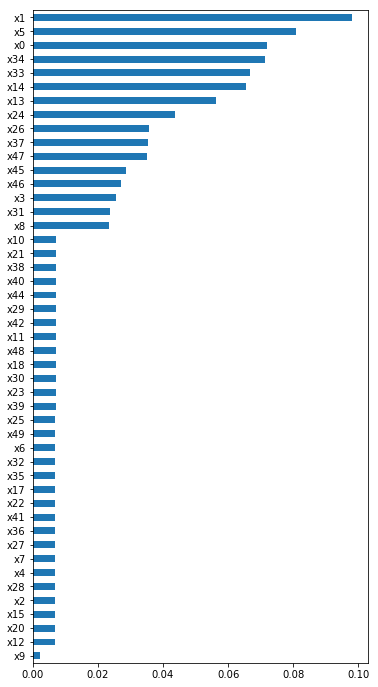

In [251]:
# Previous visualization (generated with all the features) to understand the importance of the feature in the model
featureimportance = pd.Series(model.feature_importances_, index=test_df[numeric_variables].columns)
featureimportance.sort_values(inplace=True)
featureimportance.plot(kind='barh', figsize=(6,12))

## Cross Validation

- Performing GridSearches to identify the best hyperparameters for RF Classifier
- Plotting ROC curve to understand the AUC value
- Cross Validating with K-folds using the identified best parameters

In [ ]:
# Performing GridSearch to identify best features for the RFC
# n_estimators = [500,1000,2000]
# max_features = ['auto', 'sqrt', 'log2']
# min_samples_split = [2,3,4,5,7]

# rfc = RandomForestClassifier(n_jobs=1, oob_score=True)
# estimator = GridSearchCV(rfc, dict(n_estimators=n_estimators, 
#                                   max_features=max_features, 
#                                   min_samples_split=min_samples_split), cv=None, n_jobs=-1)

In [22]:
# Performing RanmomizedSearch to tune the hyperparameters for the RF Classifier
hyperparameters = {'max_depth': [None, 10, 5], 
                   'max_features': ['auto', 'sqrt', 'log2'],
                   'min_samples_split': [2, 3, 5], 
                   'criterion': ['entropy', 'gini']
                  }
rfc = RandomForestClassifier(n_jobs=2, random_state=42, n_estimators=500)

search =  RandomizedSearchCV(rfc, hyperparameters, cv=5, scoring='roc_auc')

In [23]:
# Training the model
search.fit(X_train, y_train)

# Send SMS to remind me as soon as the model has been totally trained using Twilio client
account_sid = "AC0f7713e87ea0d942a5032f32cb5a7aab" # Your Account SID from www.twilio.com/console
auth_token  = "8e274f2b1cbf94d1ca7e43863c718104"  # Your Auth Token from www.twilio.com/console

client = TwilioRestClient(account_sid, auth_token)

message = client.messages.create(body="tada...your Model's generated",
    to="+16263408121",    # Replace with your phone number
    from_="+12135684196") # Replace with your Twilio number

print(message.sid)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=2, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [None, 10, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 5], 'criterion': ['entropy', 'gini']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [24]:
# Best parameters to use to build the final model
search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=2, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [31]:
best_rfc = search.best_estimator_

In [32]:
# Generating AUC score using the best model
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print("AUC Score: ", roc)

AUC Score:  0.974282753855


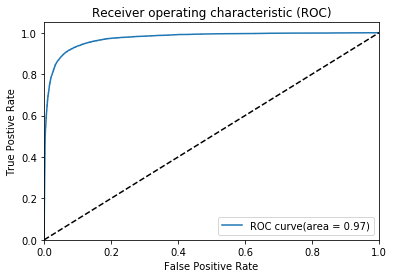

In [320]:
# Visualizing -> Area Under the Curve (AUC) for the best model
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='ROC curve(area = %0.2f)' %roc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [33]:
# Cross validating with k-folds
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, train_df, y, cv=10)
scores

array([ 0.92662959,  0.92287982,  0.9251875 ,  0.925     ,  0.9268125 ,
        0.9263125 ,  0.923625  ,  0.92125   ,  0.92662041,  0.92068254])

- True Negative Cost (TNC): We don't need to spend any amount on the True negative numbers as they are going to continue as our customers anyway.
- True Positive Cost (TPC) : We need to spend some money for these people (like giving offers, free calls, etc.) just to stop them to leave the company.
- False Positive Cost (FPC) : False Postive numbers are which we predicted as churn but actually they won't but as the model predicted True, assume we will spend some money on these people.
- False Negative Cost (FNC) : False Negative numbers ae which we predicted as won't churn and they will churn. So in this we may lost in the life-time value of the customer.

## Final Model

In [98]:
# Building the final RF Classifier model with the best parameters

rfc = RandomForestClassifier(criterion='entropy', 
                               n_estimators=2000,  
                               n_jobs=2, 
                               random_state=42, 
                               max_features='sqrt', 
                               min_samples_split=2, 
                               min_samples_leaf=1)
rfc.fit(X_train, y_train)
roc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])
print("AUC: ", roc)

AUC:  0.975599260082


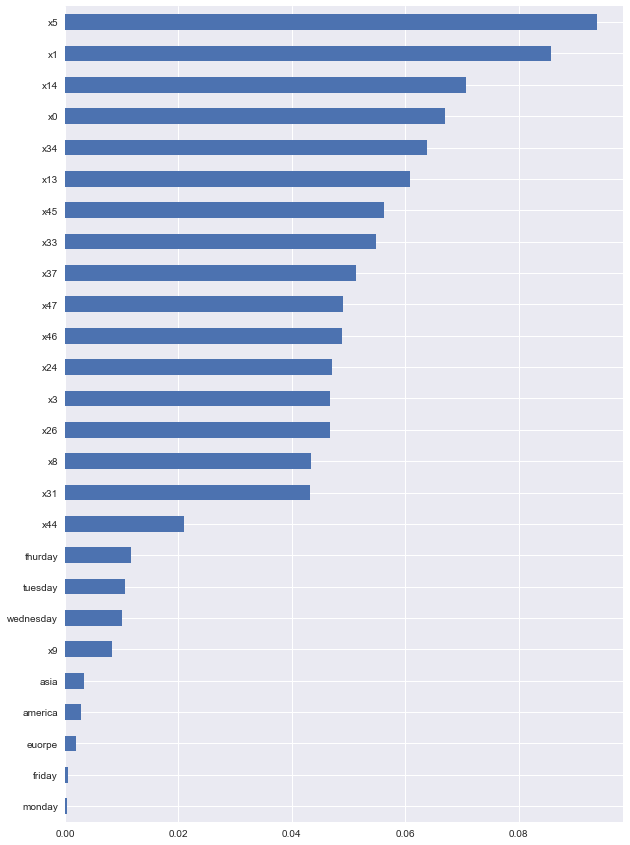

In [99]:
featureimportance = pd.Series(rfc.feature_importances_, index=train_df.columns)
featureimportance.sort_values(inplace=True)
featureimportance.plot(kind='barh', figsize=(10,15))

In [102]:
# Making Predictions for the testing dataset
predictions = rfc.predict_proba(X_test)[:,1]

In [103]:
# Exporting predicted probabilities to a submission file 
submission = pd.DataFrame({'y': predictions})
submission.to_csv("midterm12.csv", index=True)